CHN_inflation_rates    1
US_inflation_rates     1
BABA_Volume            1
AMZN_Volume            1
AMZN_Price             1
BABA_Price             1
dtype: int64
Dates                   object
CHN_inflation_rates    float64
US_inflation_rates     float64
BABA_Price             float64
AMZN_Price             float64
BABA_Volume            float64
AMZN_Volume            float64
dtype: object
CHN_inflation_rates    1
US_inflation_rates     1
BABA_Volume            1
AMZN_Volume            1
AMZN_Price             1
BABA_Price             1
dtype: int64
Dates                   object
CHN_inflation_rates    float64
US_inflation_rates     float64
BABA_Price             float64
AMZN_Price             float64
BABA_Volume            float64
AMZN_Volume            float64
dtype: object


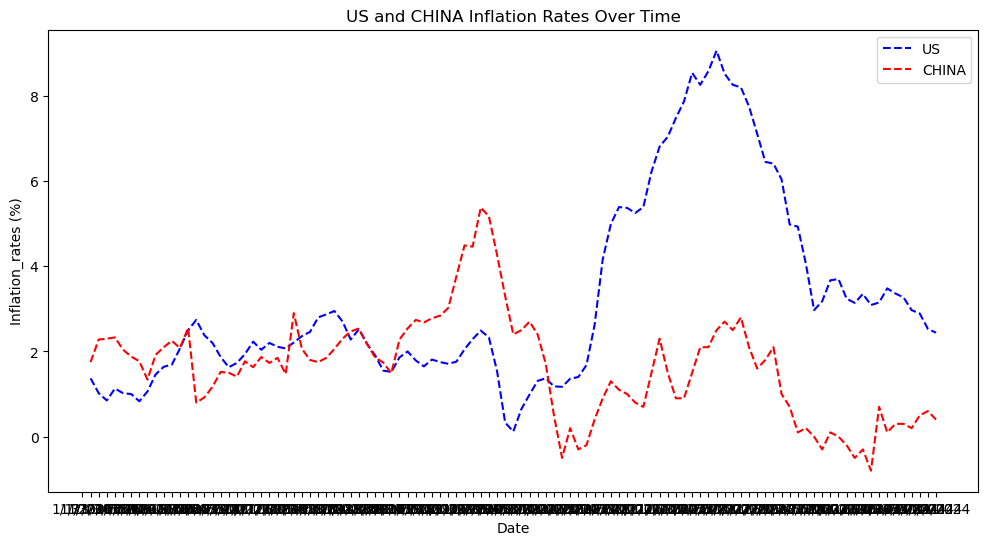

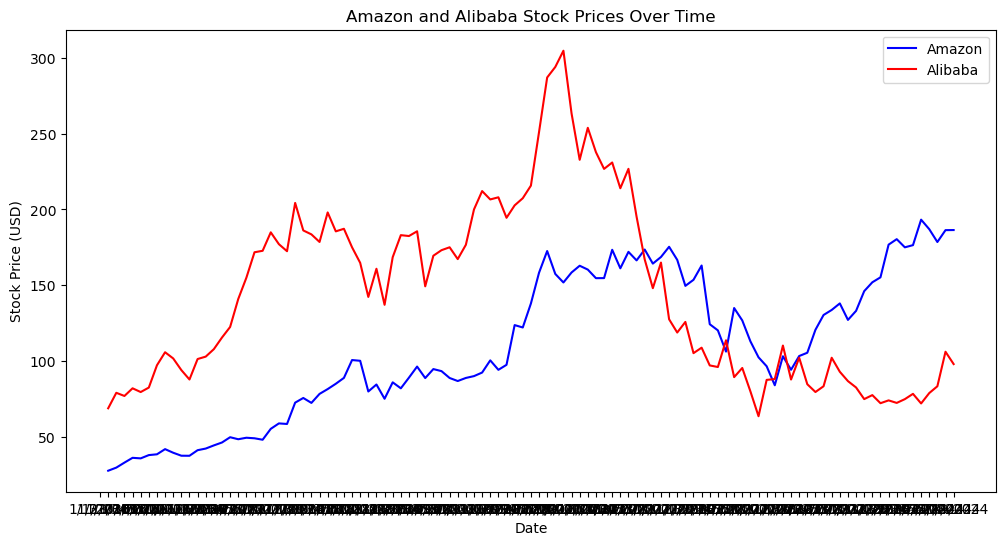

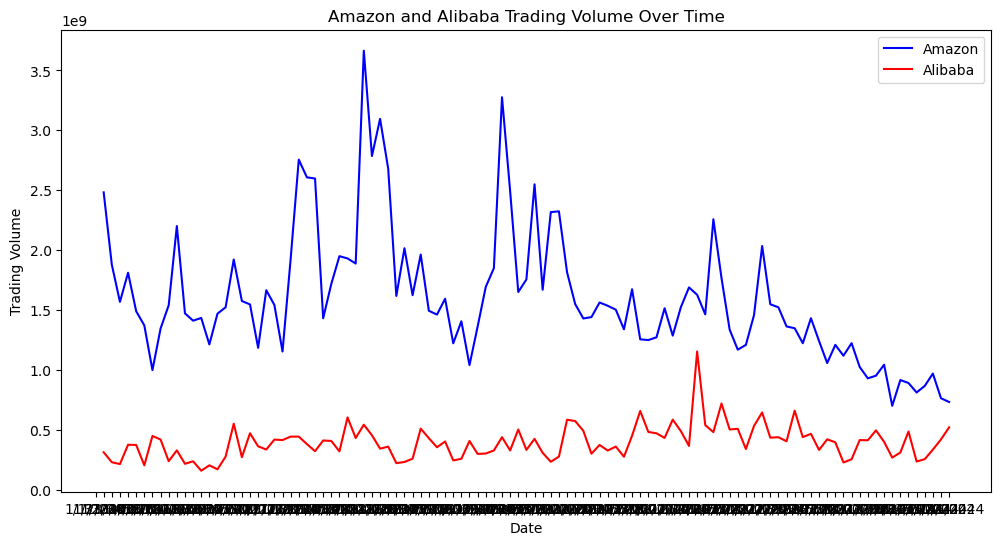

In [56]:
import pandas as pd

data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Bemm457_kasidis_740001223\Business topic raw.csv", parse_dates=['Dates'])

def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price'] #Include Price columns
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])


numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])

# Data validation after cleaning
print(data[numeric_cols].isnull().sum())
print(data.dtypes)

# Data validation after cleaning
print(data[numeric_cols].isnull().sum())
print(data.dtypes)

import matplotlib.pyplot as plt
import seaborn as sns


#Figure 3.1
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dates', y='US_inflation_rates', data=data, label='US',color='blue', linestyle='--')
sns.lineplot(x='Dates', y='CHN_inflation_rates', data=data, label='CHINA',color='red', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Inflation_rates (%)')
plt.title('US and CHINA Inflation Rates Over Time')
plt.legend()
plt.show()

#Figure 3.2
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dates', y='AMZN_Price', data=data, label='Amazon',color='blue')
sns.lineplot(x='Dates', y='BABA_Price', data=data, label='Alibaba',color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.title('Amazon and Alibaba Stock Prices Over Time')
plt.legend()
plt.show()

#Figure 3.3
plt.figure(figsize=(12, 6))
sns.lineplot(x='Dates', y='AMZN_Volume', data=data, label='Amazon',color='blue')
sns.lineplot(x='Dates', y='BABA_Volume', data=data, label='Alibaba',color='red')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Amazon and Alibaba Trading Volume Over Time')
plt.legend()
plt.show()


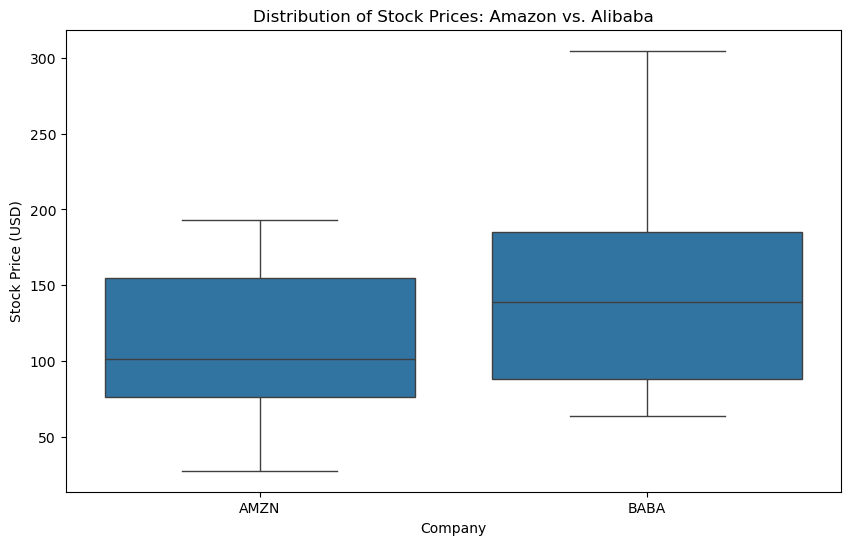

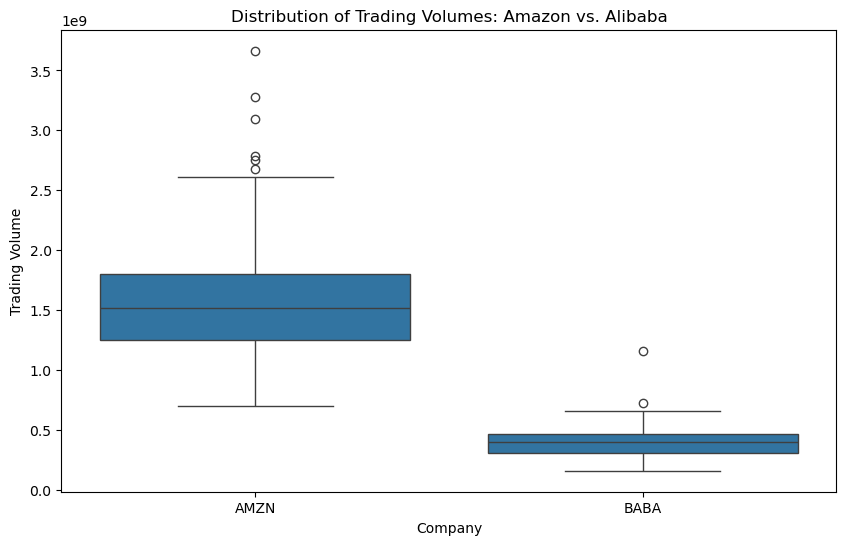

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])


def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])


for col in numeric_cols:
    mean_val = data[col].mean()
    data[col] = data[col].fillna(mean_val)


data_melted_prices = pd.melt(data, id_vars=['Dates'], value_vars=['AMZN_Price', 'BABA_Price'], var_name='Company', value_name='Stock_Price')
data_melted_prices['Company'] = data_melted_prices['Company'].str.replace('_Price', '', regex=False)

data_melted_volume = pd.melt(data, id_vars=['Dates'], value_vars=['AMZN_Volume', 'BABA_Volume'], var_name='Company', value_name='Trading_Volume')
data_melted_volume['Company'] = data_melted_volume['Company'].str.replace('_Volume', '', regex=False)


#Box Plots 
#Figure 3.3
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Stock_Price', data=data_melted_prices)
plt.xlabel('Company')
plt.ylabel('Stock Price (USD)')
plt.title('Distribution of Stock Prices: Amazon vs. Alibaba')
plt.show()

#Figure 3.4
plt.figure(figsize=(10, 6))
sns.boxplot(x='Company', y='Trading_Volume', data=data_melted_volume)
plt.xlabel('Company')
plt.ylabel('Trading Volume')
plt.title('Distribution of Trading Volumes: Amazon vs. Alibaba')
plt.show()


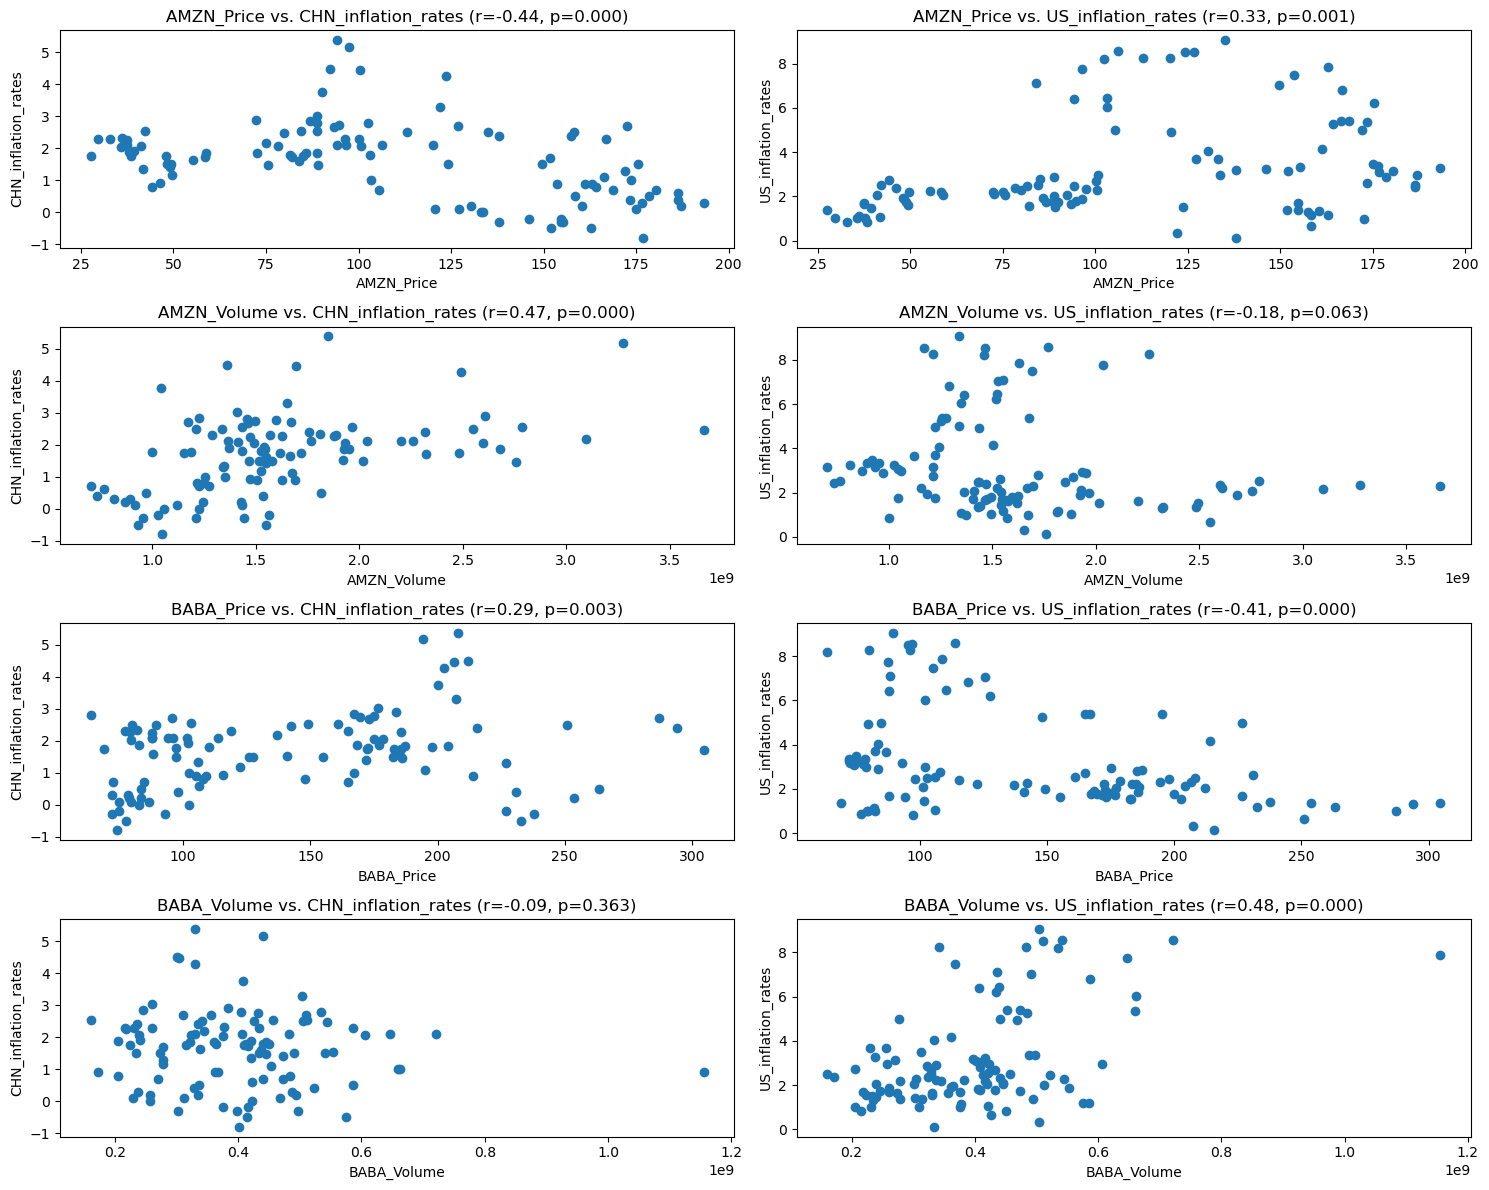

    Variable_X           Variable_Y  Correlation       P-value
0   AMZN_Price  CHN_inflation_rates    -0.437636  3.035100e-06
1   AMZN_Price   US_inflation_rates     0.327135  6.586461e-04
2  AMZN_Volume  CHN_inflation_rates     0.473051  3.471559e-07
3  AMZN_Volume   US_inflation_rates    -0.182076  6.303274e-02
4   BABA_Price  CHN_inflation_rates     0.288249  2.864820e-03
5   BABA_Price   US_inflation_rates    -0.407012  1.641506e-05
6  BABA_Volume  CHN_inflation_rates    -0.089605  3.633417e-01
7  BABA_Volume   US_inflation_rates     0.484269  1.657607e-07


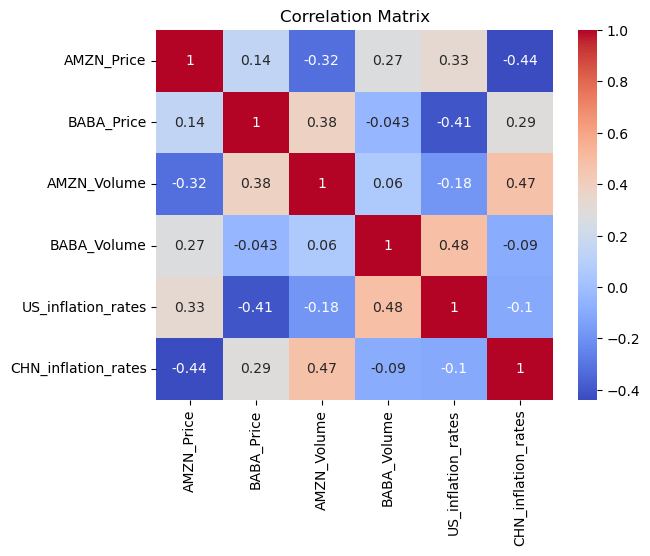

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns


results = []
pairs = [('AMZN_Price', 'CHN_inflation_rates'), ('AMZN_Price', 'US_inflation_rates'),('AMZN_Volume', 'CHN_inflation_rates'), ('AMZN_Volume', 'US_inflation_rates'),('BABA_Price', 'CHN_inflation_rates'), ('BABA_Price', 'US_inflation_rates'), 
        ('BABA_Volume', 'CHN_inflation_rates'), ('BABA_Volume', 'US_inflation_rates')]

plt.figure(figsize=(15, 12))

#Figure 4.1
for i, (x_col, y_col) in enumerate(pairs):
    plt.subplot(4, 2, i + 1)
    plt.scatter(data[x_col], data[y_col])
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    correlation, p_value = pearsonr(data[x_col].dropna(), data[y_col].dropna())
    plt.title(f'{x_col} vs. {y_col} (r={correlation:.2f}, p={p_value:.3f})')
    results.append({'Variable_X': x_col, 'Variable_Y': y_col, 'Correlation': correlation, 'P-value': p_value})

plt.tight_layout()
plt.show()



results_df = pd.DataFrame(results)


print(results_df)


results_df.to_csv('correlation_results.csv', index=False)
#Figure 4.2
correlation_matrix = data[['AMZN_Price', 'BABA_Price', 'AMZN_Volume', 'BABA_Volume', 'US_inflation_rates', 'CHN_inflation_rates']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Missing Values After Imputation:
 Dates                  0
CHN_inflation_rates    0
US_inflation_rates     0
BABA_Price             0
AMZN_Price             0
BABA_Volume            0
AMZN_Volume            0
dtype: int64

Autocorrelation for CHN_inflation_rates:


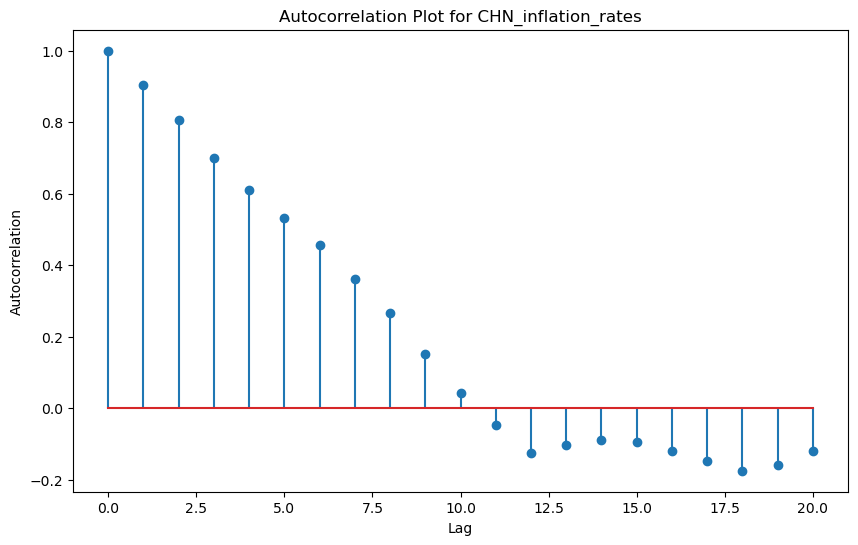

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.9036028101881097
Lag 2: 0.8053219232614043
Lag 3: 0.6985558152125574
Lag 4: 0.6102065680271044
Lag 5: 0.5316089466560913
Lag 6: 0.4558880476155168
Lag 7: 0.3608782409875743
Lag 8: 0.265801880736573
Lag 9: 0.15074074532063897
Lag 10: 0.04199953614774959
Lag 11: -0.04619954911031646
Lag 12: -0.1248401477735512
Lag 13: -0.10326035000172902
Lag 14: -0.08948619097679032
Lag 15: -0.09421750904003533
Lag 16: -0.1185861825166064
Lag 17: -0.14746826007703198
Lag 18: -0.17472177325637633
Lag 19: -0.1598057642158047
Lag 20: -0.11910124169985252

Autocorrelation for US_inflation_rates:


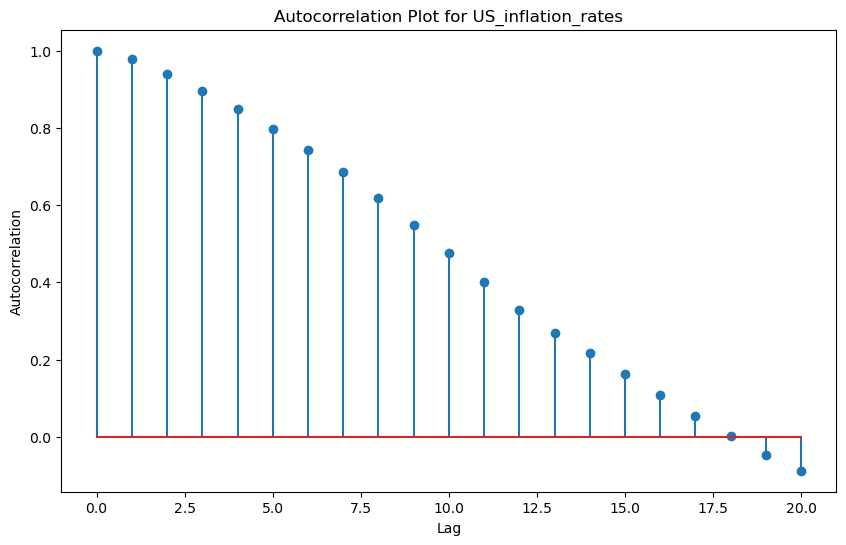

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.9794201555653982
Lag 2: 0.9407788009571945
Lag 3: 0.8967941437882985
Lag 4: 0.8488049275374135
Lag 5: 0.7974824234210923
Lag 6: 0.74347181686833
Lag 7: 0.6852190171201953
Lag 8: 0.6186974161536785
Lag 9: 0.5472263522054156
Lag 10: 0.47640671194989986
Lag 11: 0.4016902905590607
Lag 12: 0.32841277255545676
Lag 13: 0.2683042878896429
Lag 14: 0.21616934187412948
Lag 15: 0.16344988573358454
Lag 16: 0.1083439945129268
Lag 17: 0.05431748395597973
Lag 18: 0.0015991349288316794
Lag 19: -0.04784283552135514
Lag 20: -0.08806140217405807

Autocorrelation for BABA_Volume:


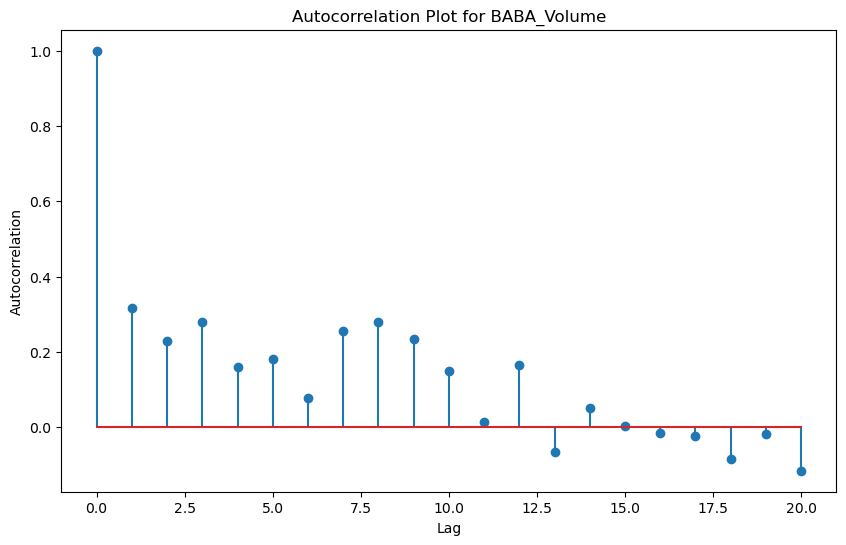

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.3161528026584969
Lag 2: 0.23044694771650182
Lag 3: 0.2787130685951659
Lag 4: 0.16023155138787887
Lag 5: 0.18145393062947895
Lag 6: 0.07897367112449073
Lag 7: 0.25531557005811367
Lag 8: 0.2790733679175867
Lag 9: 0.23456595165334534
Lag 10: 0.14875802632471516
Lag 11: 0.015316435756395231
Lag 12: 0.16639215674141408
Lag 13: -0.06677314100534591
Lag 14: 0.051142543749546326
Lag 15: 0.0037079560594786344
Lag 16: -0.014375677246651475
Lag 17: -0.02191383775102927
Lag 18: -0.08320971686728368
Lag 19: -0.017280168215922518
Lag 20: -0.11518599965096243

Autocorrelation for AMZN_Volume:


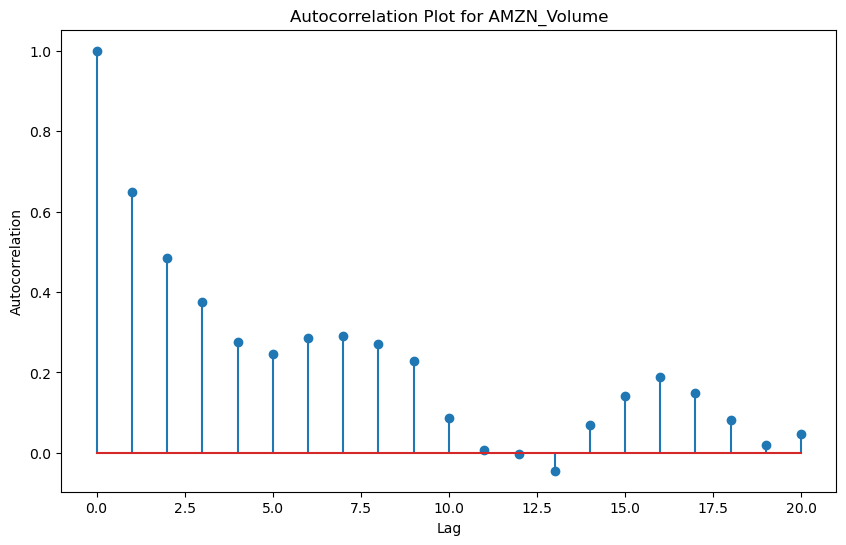

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.6475974430812435
Lag 2: 0.4855560754608204
Lag 3: 0.3761220991463617
Lag 4: 0.274961697893844
Lag 5: 0.24531818201642713
Lag 6: 0.28463388171565857
Lag 7: 0.29060531075048157
Lag 8: 0.2701771135078316
Lag 9: 0.2291666189249109
Lag 10: 0.08788402784954741
Lag 11: 0.006529652783490055
Lag 12: -0.003690065004523987
Lag 13: -0.04439067523338311
Lag 14: 0.069903776041635
Lag 15: 0.1402570311537517
Lag 16: 0.1898023376438202
Lag 17: 0.1478790091831986
Lag 18: 0.08119206249414695
Lag 19: 0.019773464960272876
Lag 20: 0.046942743046679745

Autocorrelation for AMZN_Price:


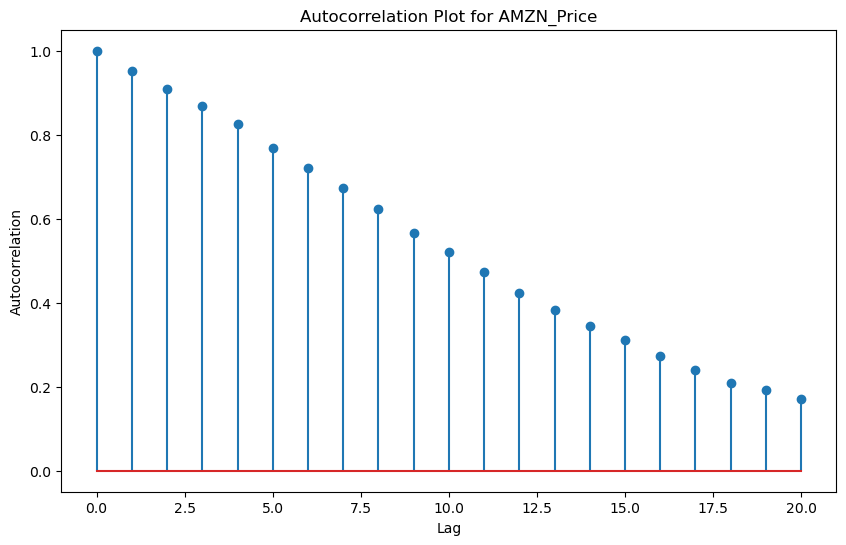

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.9523867050894109
Lag 2: 0.9088044605979718
Lag 3: 0.8676750268243636
Lag 4: 0.8246881340000939
Lag 5: 0.7692244427173558
Lag 6: 0.720685657439549
Lag 7: 0.6736298939090414
Lag 8: 0.621968946908743
Lag 9: 0.5670290283089747
Lag 10: 0.5207918205892086
Lag 11: 0.47222550257206664
Lag 12: 0.4241412232325588
Lag 13: 0.38205651089003356
Lag 14: 0.34472127650548257
Lag 15: 0.31064393111796285
Lag 16: 0.27396986931547324
Lag 17: 0.2387727162988271
Lag 18: 0.20776161117312347
Lag 19: 0.1913130756918302
Lag 20: 0.17035233932063554

Autocorrelation for BABA_Price:


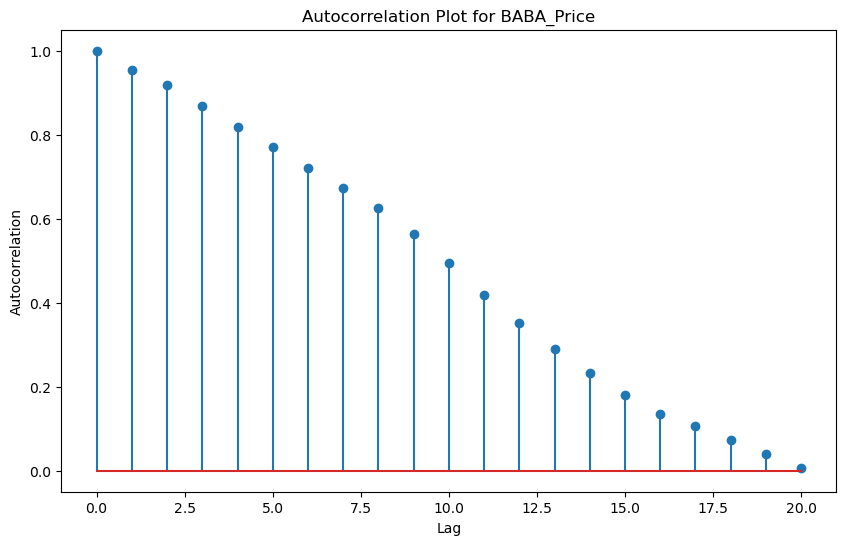

Autocorrelation Values:
Lag 0: 1.0
Lag 1: 0.9545659376519573
Lag 2: 0.9172109655877466
Lag 3: 0.8672774277150695
Lag 4: 0.8179260774963291
Lag 5: 0.7717640395393928
Lag 6: 0.7207510903980482
Lag 7: 0.673007306885284
Lag 8: 0.624445137927202
Lag 9: 0.5648106887715479
Lag 10: 0.49382558536940907
Lag 11: 0.4193846974860256
Lag 12: 0.35216288077571684
Lag 13: 0.28910652311939505
Lag 14: 0.23255741105765487
Lag 15: 0.18123815890760858
Lag 16: 0.13544052568896606
Lag 17: 0.10591056990217972
Lag 18: 0.07301875984517354
Lag 19: 0.0396447613626604
Lag 20: 0.005913880806213737


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.impute import KNNImputer #More robust imputation


data = pd.read_csv(r"C:\Users\User\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')  # Coerce errors to NaN
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])


imputer = KNNImputer(n_neighbors=5) 
for col in numeric_cols:
    data[col] = imputer.fit_transform(data[[col]])



print("\nMissing Values After Imputation:\n", data.isnull().sum())


if not pd.api.types.is_datetime64_any_dtype(data.index):
    if 'Dates' in data.columns:
        data = data.set_index('Dates')
        data.index = pd.to_datetime(data.index)
    else:
        print("Warning: No suitable datetime index found. Autocorrelation results may not be meaningful.")


for col in numeric_cols:
    print(f"\nAutocorrelation for {col}:")
    try:
        
        if data[col].isnull().all():
            print(f"Column '{col}' contains only NaNs after imputation.  Autocorrelation cannot be calculated.")
            continue #Skip to the next column

        autocorrelation = sm.tsa.acf(data[col], nlags=20)

        plt.figure(figsize=(10, 6))
        plt.stem(range(len(autocorrelation)), autocorrelation)
        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")
        plt.title(f"Autocorrelation Plot for {col}")
        plt.show()
        print("Autocorrelation Values:")
        for i, val in enumerate(autocorrelation):
            print(f"Lag {i}: {val}")

    except Exception as e:
        print(f"Error calculating autocorrelation for {col}: {e}")

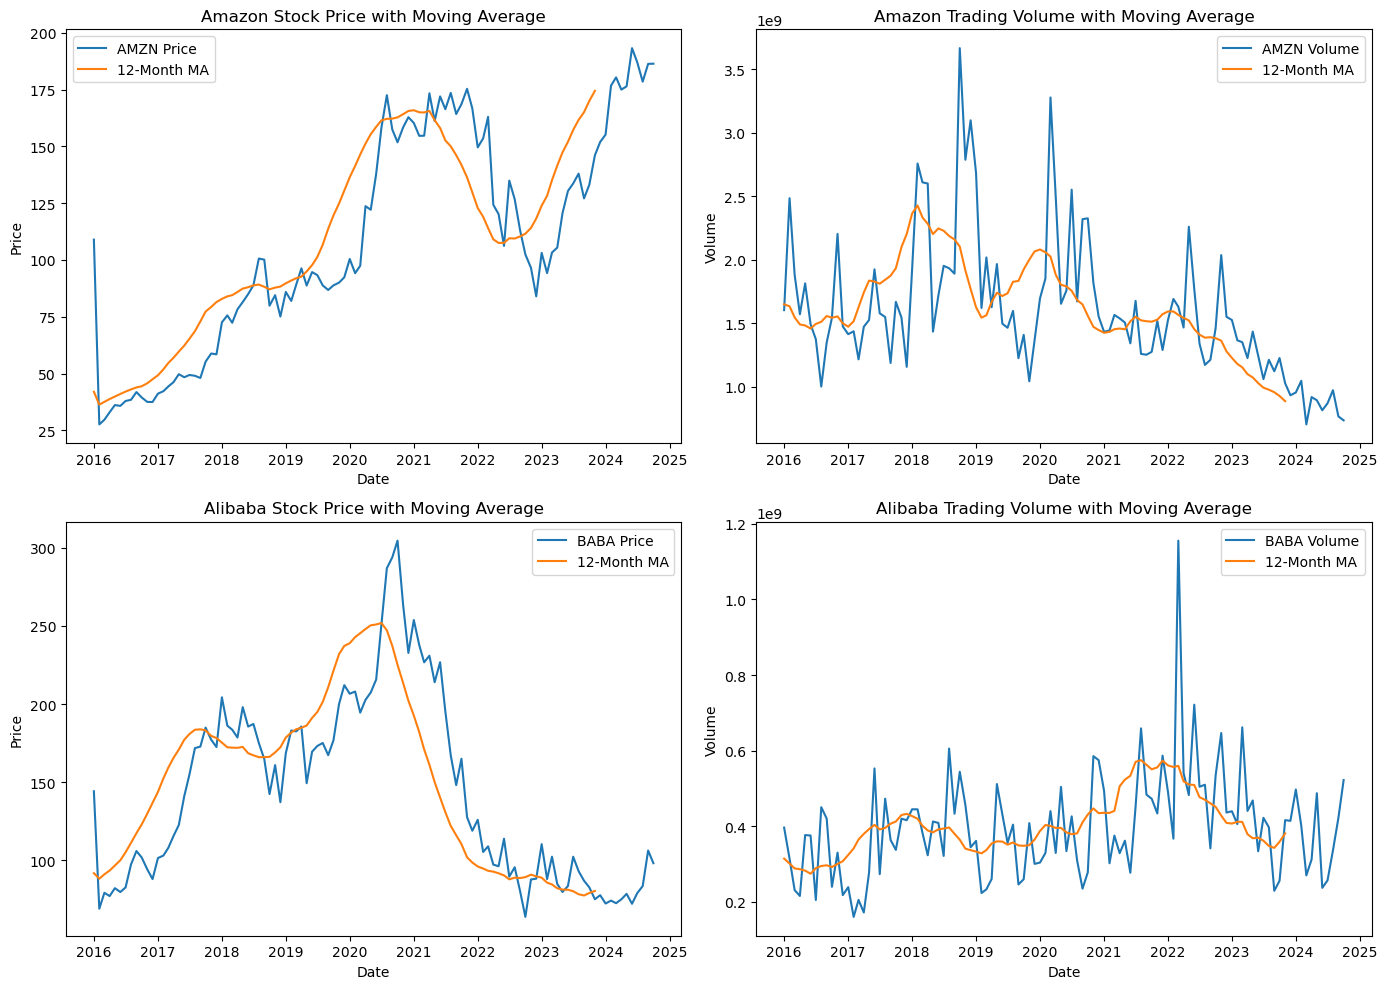

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

def clean_and_convert(column):
    """
    Cleans and converts a Pandas Series to numeric, handling errors and empty columns.
    """
    try:
        original_length = len(column)  #Store original length for check
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')

        #Check for empty column after cleaning:
        if column.isnull().all():  #All values are NaN
            print(f"WARNING: Column '{column.name}' is empty after cleaning.  Skipping.")
            return pd.Series(dtype='float64') #Returns an empty series of the correct datatype
        elif column.isnull().sum() > 0: #Some values are NaN - perform imputation
            #column = column.dropna() #Uncomment to drop rows with NaN
            column = column.fillna(column.mean()) #Impute with the mean (adjust as needed)
        
        #Verification check:  Ensure length hasn't drastically changed.  If it has then there were many NaNs
        if len(column) *2 < original_length:  #More than half the data was removed due to NaNs
            print(f"WARNING: Significant data loss in '{column.name}' after cleaning. Consider imputation or alternative data cleaning")
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return pd.Series(dtype='float64') #Return an empty Series to prevent errors downstream

# Set 'Date' as index
data = data.set_index('Dates')

# Define window size for moving average
window_size = 12  # Example: 12-month moving average

# Calculate moving averages
data['AMZN_Price_MA'] = data['AMZN_Price'].rolling(window=window_size).mean()
data['AMZN_Volume_MA'] = data['AMZN_Volume'].rolling(window=window_size).mean()
data['BABA_Price_MA'] = data['BABA_Price'].rolling(window=window_size).mean()
data['BABA_Volume_MA'] = data['BABA_Volume'].rolling(window=window_size).mean()

# Create the plots
plt.figure(figsize=(14, 10))

#Plot 1: AMZN Price
plt.subplot(2, 2, 1)
plt.plot(data['AMZN_Price'], label='AMZN Price')
plt.plot(data['AMZN_Price_MA'], label=f'{window_size}-Month MA')
plt.title('Amazon Stock Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()


#Plot 2: AMZN Volume
plt.subplot(2, 2, 2)
plt.plot(data['AMZN_Volume'], label='AMZN Volume')
plt.plot(data['AMZN_Volume_MA'], label=f'{window_size}-Month MA')
plt.title('Amazon Trading Volume with Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

#Plot 3: BABA Price
plt.subplot(2, 2, 3)
plt.plot(data['BABA_Price'], label='BABA Price')
plt.plot(data['BABA_Price_MA'], label=f'{window_size}-Month MA')
plt.title('Alibaba Stock Price with Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

#Plot 4: BABA Volume
plt.subplot(2, 2, 4)
plt.plot(data['BABA_Volume'], label='BABA Volume')
plt.plot(data['BABA_Volume_MA'], label=f'{window_size}-Month MA')
plt.title('Alibaba Trading Volume with Moving Average')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()

plt.tight_layout()
plt.show()

In [17]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

#Data Import (replace with your file path)
data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_data(df, col):
    """Robustly cleans a single column, handling various error conditions."""
    try:
        original_length = len(df[col])
        #Convert to string, strip, and remove commas and percentage signs
        df[col] = df[col].astype(str).str.strip().str.replace('%', '', regex=False).str.replace(',', '', regex=False)
        #Attempt conversion to numeric, but coerce errors to NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        #Check for completely empty columns after cleaning
        if df[col].isnull().all():
            print(f"WARNING: Column '{col}' is completely empty after cleaning and will be skipped.")
            return

        #Impute missing values using KNNImputer
        imputer = KNNImputer(n_neighbors=5) #You can adjust n_neighbors
        df[col] = imputer.fit_transform(df[[col]])

        #Verification check for significant data loss
        if len(df[col]) * 2 < original_length:
            print(f"WARNING: Significant data loss in '{col}' after cleaning. Consider alternative cleaning techniques.")

    except Exception as e:
        print(f"An unexpected error occurred while cleaning '{col}': {e}")
#Set the 'Dates' column as the index.
data = data.set_index('Dates')

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    clean_data(data, col)


# Example: Simple linear regression of AMZN Price on AMZN Volume (adapt as needed)
X = data['AMZN_Volume']  # Independent variable
y = data['AMZN_Volume']  # Dependent variable
X = sm.add_constant(X) #Add a constant to the independent variable
model = sm.OLS(y, X).fit()
dw_amzn_v = durbin_watson(model.resid)  # Calculate Durbin-Watson statistic for AMZN

# Example: Simple linear regression of AMZN Price on AMZN Volume (adapt as needed)
X = data['AMZN_Price']  # Independent variable
y = data['AMZN_Price']  # Dependent variable
X = sm.add_constant(X) #Add a constant to the independent variable
model = sm.OLS(y, X).fit()
dw_amzn_p = durbin_watson(model.resid)


#Repeat for BABA - Adapt as needed
X = data['BABA_Volume']
y = data['BABA_Volume']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
dw_baba_v = durbin_watson(model.resid)

#Repeat for BABA - Adapt as needed
X = data['BABA_Price']
y = data['BABA_Price']
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
dw_baba_p = durbin_watson(model.resid)


print(f"Durbin-Watson statistic for AMZN: {dw_amzn_v}")
print(f"Durbin-Watson statistic for BABA: {dw_baba_v}")
print(f"Durbin-Watson statistic for AMZN: {dw_amzn_p}")
print(f"Durbin-Watson statistic for BABA: {dw_baba_p}")

Durbin-Watson statistic for AMZN: 0.10612760581174985
Durbin-Watson statistic for BABA: 0.6102403343782654
Durbin-Watson statistic for AMZN: 0.08087291399229782
Durbin-Watson statistic for BABA: 0.008678384937853938



Missing Values After Imputation:
 CHN_inflation_rates    0
US_inflation_rates     0
BABA_Price             0
AMZN_Price             0
BABA_Volume            0
AMZN_Volume            0
dtype: int64


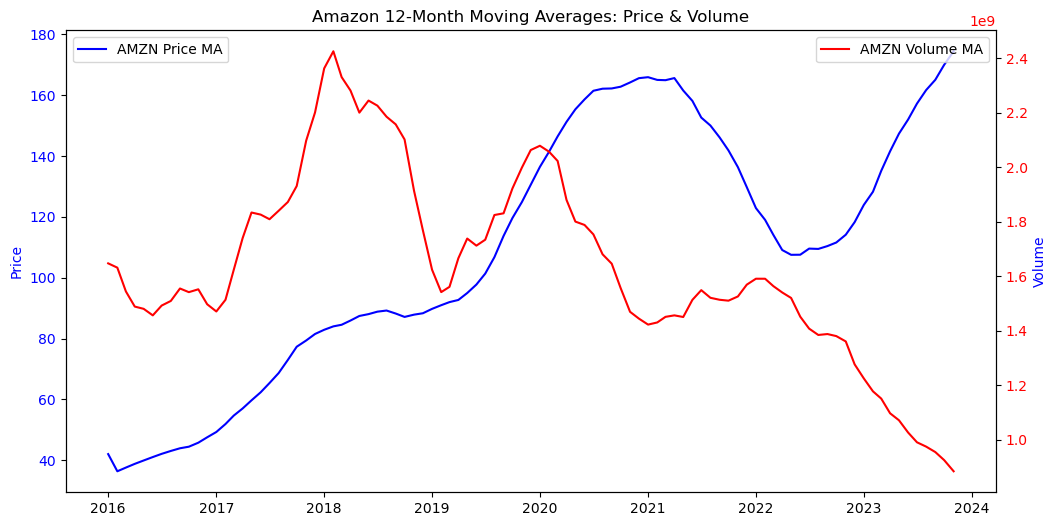

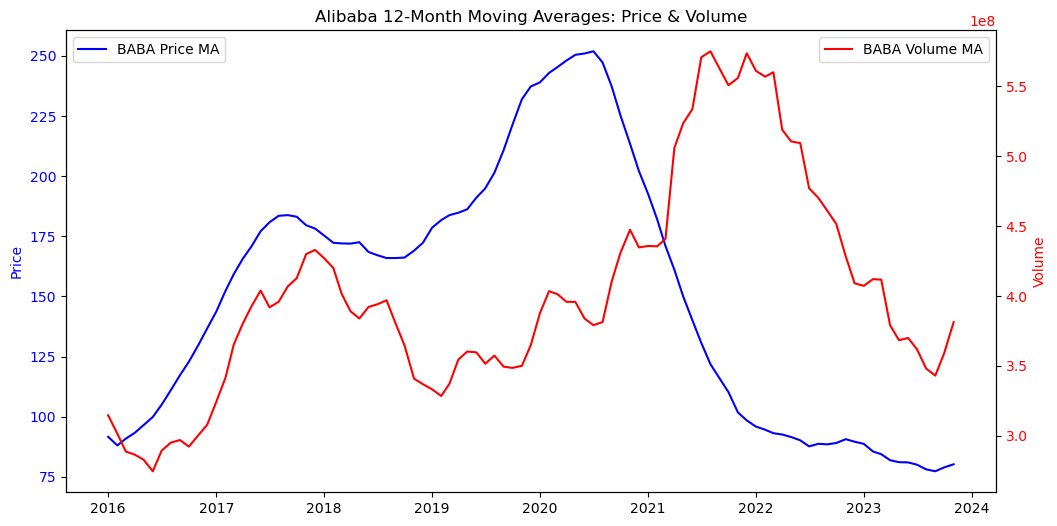

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer


data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_data(df, col):
    """Robustly cleans a single column, handling various error conditions."""
    try:
        original_length = len(df[col])
       
        df[col] = df[col].astype(str).str.strip().str.replace('%', '', regex=False).str.replace(',', '', regex=False)
      
        df[col] = pd.to_numeric(df[col], errors='coerce')

   
        if df[col].isnull().all():
            print(f"WARNING: Column '{col}' is completely empty after cleaning and will be skipped.")
            return

      
        imputer = KNNImputer(n_neighbors=5) 
        df[col] = imputer.fit_transform(df[[col]])

       
        if len(df[col]) * 2 < original_length:
            print(f"WARNING: Significant data loss in '{col}' after cleaning. Consider alternative cleaning techniques.")

    except Exception as e:
        print(f"An unexpected error occurred while cleaning '{col}': {e}")

data = data.set_index('Dates')

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    clean_data(data, col)



print("\nMissing Values After Imputation:\n", data.isnull().sum())


window_size = 12
data['AMZN_Price_MA'] = data['AMZN_Price'].rolling(window=window_size).mean()
data['AMZN_Volume_MA'] = data['AMZN_Volume'].rolling(window=window_size).mean()
data['BABA_Price_MA'] = data['BABA_Price'].rolling(window=window_size).mean()
data['BABA_Volume_MA'] = data['BABA_Volume'].rolling(window=window_size).mean()


plt.figure(figsize=(12, 6))
ax1 = plt.gca() 
ax2 = ax1.twinx()  


ax1.plot(data['AMZN_Price_MA'], label='AMZN Price MA', color='blue')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2.plot(data['AMZN_Volume_MA'], label='AMZN Volume MA', color='red')
ax2.set_ylabel('Volume', color='blue')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Amazon 12-Month Moving Averages: Price & Volume')
plt.xlabel('Date')
ax1.legend(loc='upper left') 
ax2.legend(loc='upper right') 
plt.show()


plt.figure(figsize=(12, 6))
ax1 = plt.gca()
ax2 = ax1.twinx()


ax1.plot(data['BABA_Price_MA'], label='BABA Price MA', color='blue')
ax1.set_ylabel('Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


ax2.plot(data['BABA_Volume_MA'], label='BABA Volume MA', color='red')
ax2.set_ylabel('Volume', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Alibaba 12-Month Moving Averages: Price & Volume')
plt.xlabel('Date')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


Autocorrelation and Partial Autocorrelation for CHN_inflation_rates:


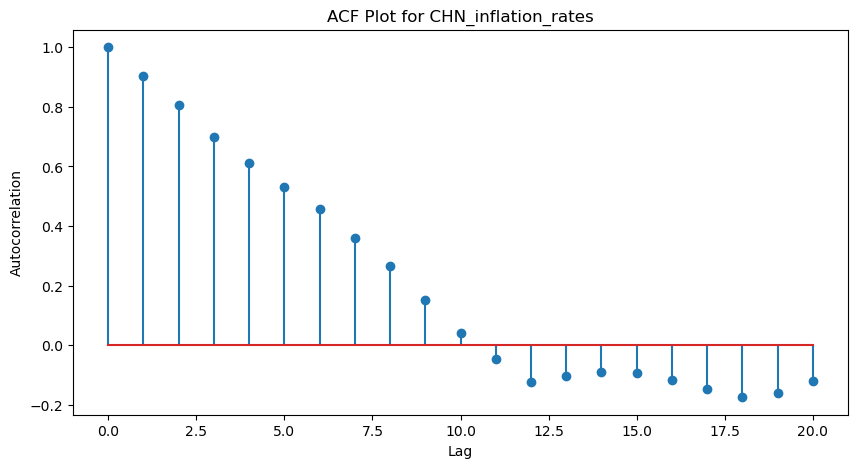

ACF Values:
Lag 0: 1.0
Lag 1: 0.9036028101881097
Lag 2: 0.8053219232614043
Lag 3: 0.6985558152125574
Lag 4: 0.6102065680271044
Lag 5: 0.5316089466560913
Lag 6: 0.4558880476155168
Lag 7: 0.3608782409875743
Lag 8: 0.265801880736573
Lag 9: 0.15074074532063897
Lag 10: 0.04199953614774959
Lag 11: -0.04619954911031646
Lag 12: -0.1248401477735512
Lag 13: -0.10326035000172902
Lag 14: -0.08948619097679032
Lag 15: -0.09421750904003533
Lag 16: -0.1185861825166064
Lag 17: -0.14746826007703198
Lag 18: -0.17472177325637633
Lag 19: -0.1598057642158047
Lag 20: -0.11910124169985252


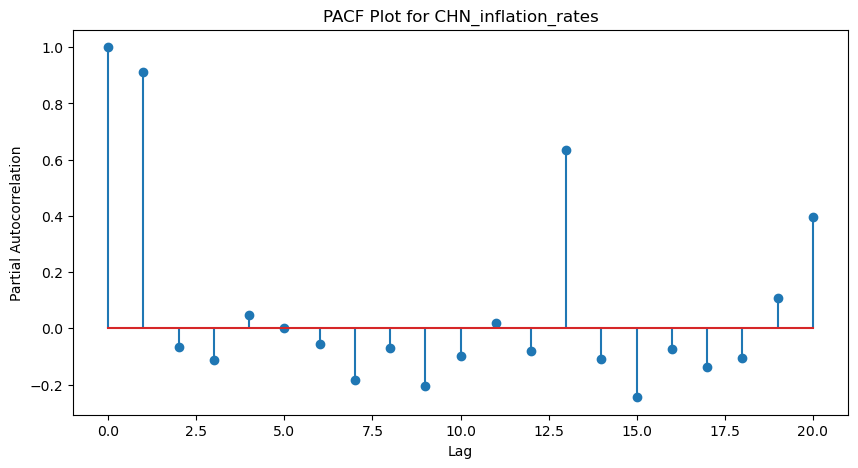

PACF Values:
Lag 0: 1.0
Lag 1: 0.9122085512375201
Lag 2: -0.06740443749419774
Lag 3: -0.11267161841838326
Lag 4: 0.04643444166086267
Lag 5: -0.0005172418888014983
Lag 6: -0.054982982482630824
Lag 7: -0.18343080929680064
Lag 8: -0.06888294371599038
Lag 9: -0.20626114765421208
Lag 10: -0.09925401299670782
Lag 11: 0.018574637328796884
Lag 12: -0.08015650392371852
Lag 13: 0.6327088506277639
Lag 14: -0.10871764163711635
Lag 15: -0.24511391835793678
Lag 16: -0.07419306370515771
Lag 17: -0.13910791105095674
Lag 18: -0.10430261307560505
Lag 19: 0.10633038932315332
Lag 20: 0.39559997608454006

Autocorrelation and Partial Autocorrelation for US_inflation_rates:


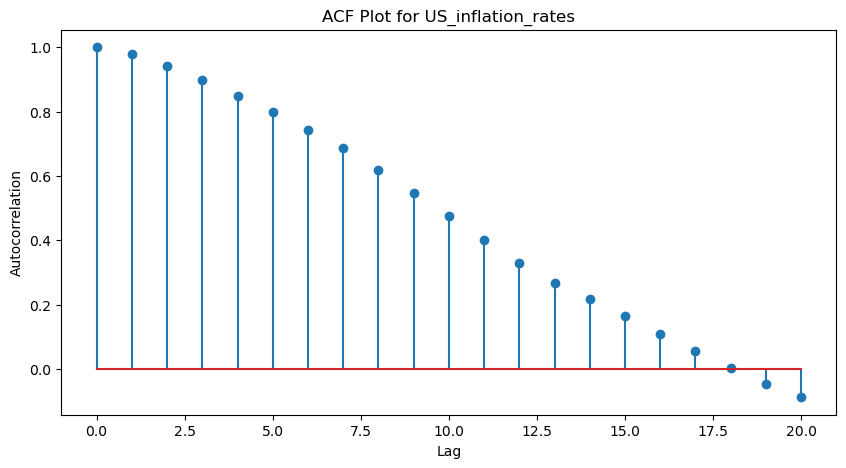

ACF Values:
Lag 0: 1.0
Lag 1: 0.9794201555653982
Lag 2: 0.9407788009571945
Lag 3: 0.8967941437882985
Lag 4: 0.8488049275374135
Lag 5: 0.7974824234210923
Lag 6: 0.74347181686833
Lag 7: 0.6852190171201953
Lag 8: 0.6186974161536785
Lag 9: 0.5472263522054156
Lag 10: 0.47640671194989986
Lag 11: 0.4016902905590607
Lag 12: 0.32841277255545676
Lag 13: 0.2683042878896429
Lag 14: 0.21616934187412948
Lag 15: 0.16344988573358454
Lag 16: 0.1083439945129268
Lag 17: 0.05431748395597973
Lag 18: 0.0015991349288316794
Lag 19: -0.04784283552135514
Lag 20: -0.08806140217405807


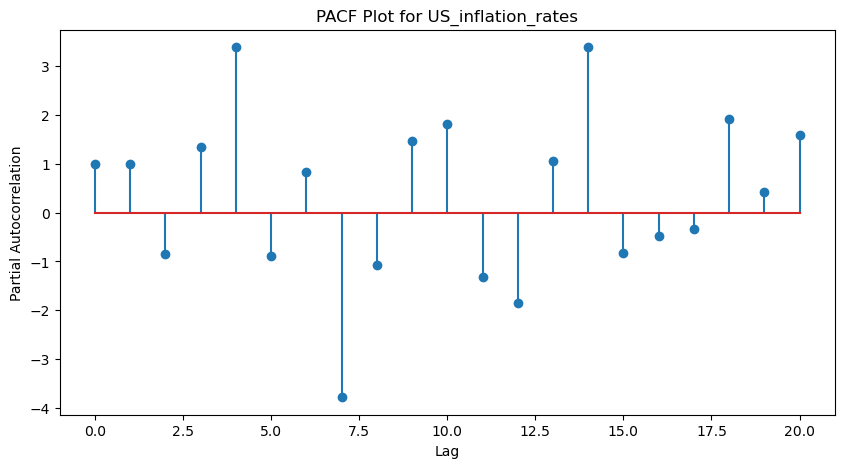

PACF Values:
Lag 0: 1.0
Lag 1: 0.9887479665707829
Lag 2: -0.8379790018005386
Lag 3: 1.337161139181765
Lag 4: 3.386566695504421
Lag 5: -0.8881244659923021
Lag 6: 0.8283926090392846
Lag 7: -3.781043055597575
Lag 8: -1.0771516006563433
Lag 9: 1.4594779778116345
Lag 10: 1.8058715927353604
Lag 11: -1.3106611754354172
Lag 12: -1.8595658665007895
Lag 13: 1.0569288082271635
Lag 14: 3.3811198843674988
Lag 15: -0.8327085726486968
Lag 16: -0.47603891483876914
Lag 17: -0.3423870933087241
Lag 18: 1.912502054271435
Lag 19: 0.42038637661294564
Lag 20: 1.5879311536493768

Autocorrelation and Partial Autocorrelation for BABA_Volume:


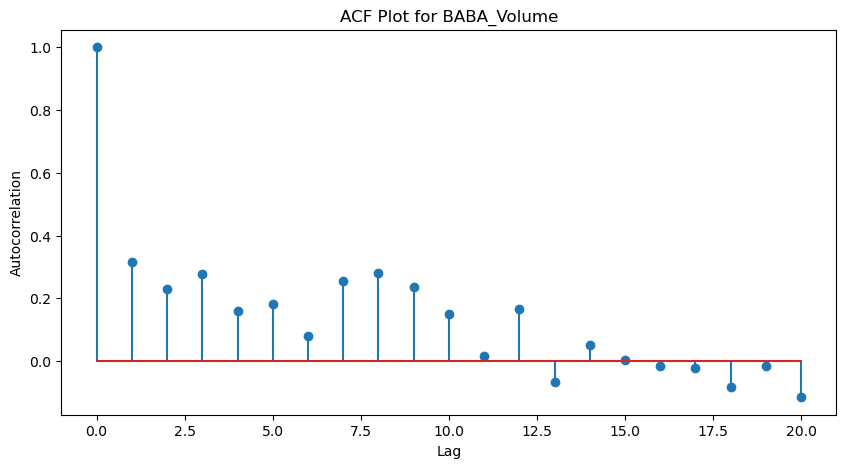

ACF Values:
Lag 0: 1.0
Lag 1: 0.3161528026584969
Lag 2: 0.23044694771650182
Lag 3: 0.2787130685951659
Lag 4: 0.16023155138787887
Lag 5: 0.18145393062947895
Lag 6: 0.07897367112449073
Lag 7: 0.25531557005811367
Lag 8: 0.2790733679175867
Lag 9: 0.23456595165334534
Lag 10: 0.14875802632471516
Lag 11: 0.015316435756395231
Lag 12: 0.16639215674141408
Lag 13: -0.06677314100534591
Lag 14: 0.051142543749546326
Lag 15: 0.0037079560594786344
Lag 16: -0.014375677246651475
Lag 17: -0.02191383775102927
Lag 18: -0.08320971686728368
Lag 19: -0.017280168215922518
Lag 20: -0.11518599965096243


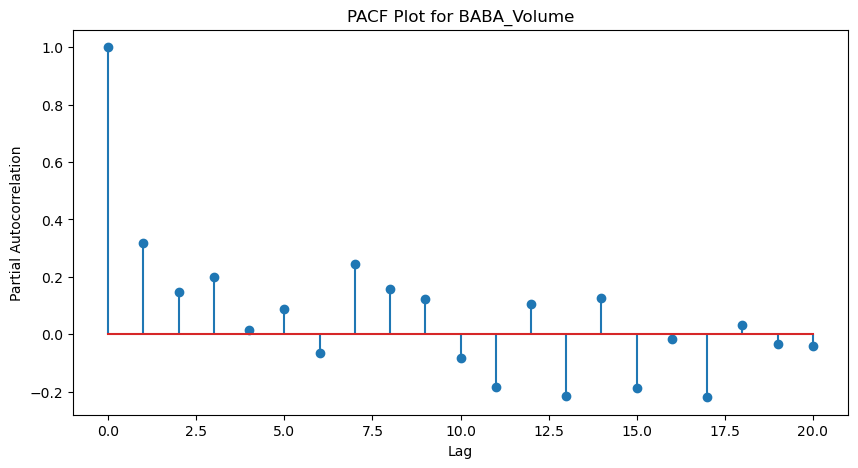

PACF Values:
Lag 0: 1.0
Lag 1: 0.3191637817314349
Lag 2: 0.14809931376317687
Lag 3: 0.2000152553880505
Lag 4: 0.013250486150848107
Lag 5: 0.08724132282311156
Lag 6: -0.0650419344504244
Lag 7: 0.2431965950213078
Lag 8: 0.15838585448352002
Lag 9: 0.12323633767817489
Lag 10: -0.08434706881853682
Lag 11: -0.18218105069927631
Lag 12: 0.10694059773504855
Lag 13: -0.21563104307033099
Lag 14: 0.12677932308555317
Lag 15: -0.18875164209514123
Lag 16: -0.017834154263063954
Lag 17: -0.2192528151096233
Lag 18: 0.032878526303865965
Lag 19: -0.03217955332337593
Lag 20: -0.03941936255997526

Autocorrelation and Partial Autocorrelation for AMZN_Volume:


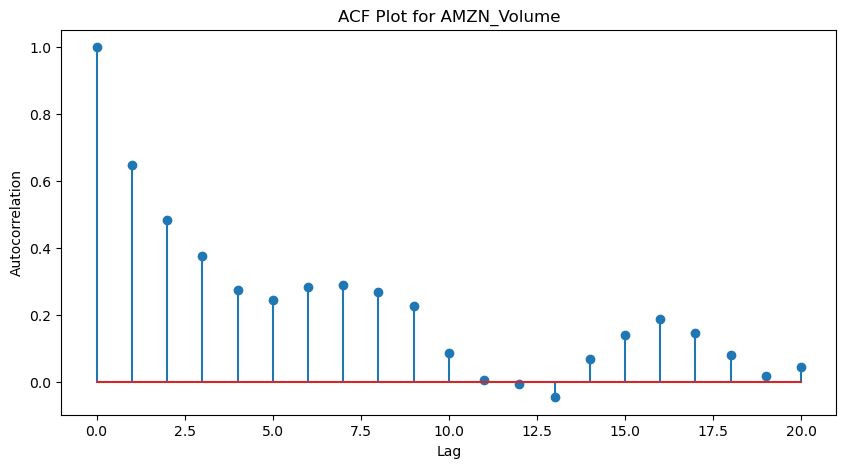

ACF Values:
Lag 0: 1.0
Lag 1: 0.6475974430812435
Lag 2: 0.4855560754608204
Lag 3: 0.3761220991463617
Lag 4: 0.274961697893844
Lag 5: 0.24531818201642713
Lag 6: 0.28463388171565857
Lag 7: 0.29060531075048157
Lag 8: 0.2701771135078316
Lag 9: 0.2291666189249109
Lag 10: 0.08788402784954741
Lag 11: 0.006529652783490055
Lag 12: -0.003690065004523987
Lag 13: -0.04439067523338311
Lag 14: 0.069903776041635
Lag 15: 0.1402570311537517
Lag 16: 0.1898023376438202
Lag 17: 0.1478790091831986
Lag 18: 0.08119206249414695
Lag 19: 0.019773464960272876
Lag 20: 0.046942743046679745


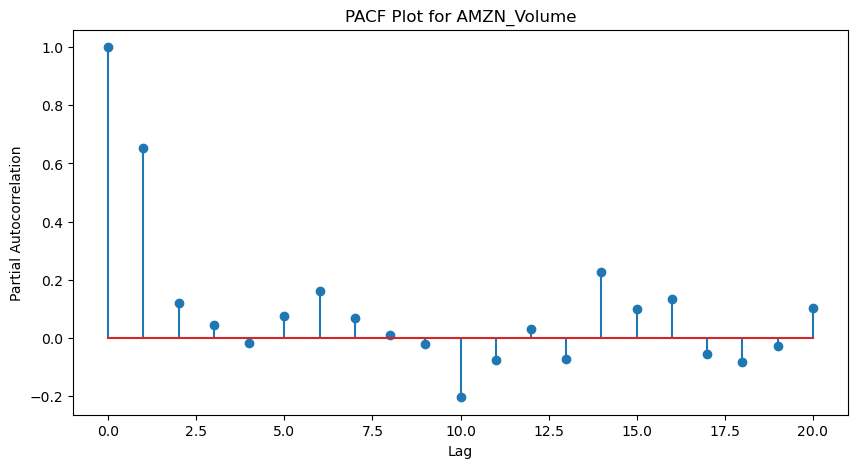

PACF Values:
Lag 0: 1.0
Lag 1: 0.6537650377772553
Lag 2: 0.11785888220513072
Lag 3: 0.0435916062021733
Lag 4: -0.01753829888096389
Lag 5: 0.0751386928448117
Lag 6: 0.16250828704116202
Lag 7: 0.06721756246861717
Lag 8: 0.009527402439679334
Lag 9: -0.023113376481130744
Lag 10: -0.2048120975185603
Lag 11: -0.07705704497109236
Lag 12: 0.030062450441488225
Lag 13: -0.07405194262080277
Lag 14: 0.22614336916910985
Lag 15: 0.09774927294031695
Lag 16: 0.13295511115660602
Lag 17: -0.05631388667954687
Lag 18: -0.08286023612754355
Lag 19: -0.02920028543249955
Lag 20: 0.10393126370570183

Autocorrelation and Partial Autocorrelation for AMZN_Price:


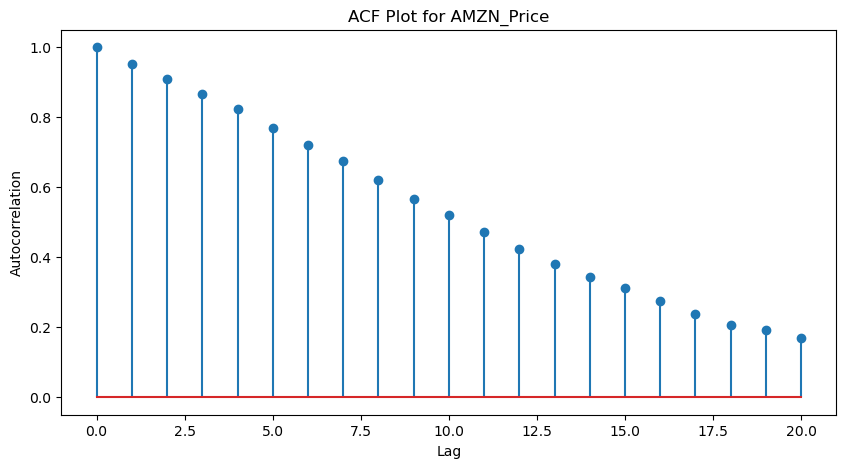

ACF Values:
Lag 0: 1.0
Lag 1: 0.9523867050894109
Lag 2: 0.9088044605979718
Lag 3: 0.8676750268243636
Lag 4: 0.8246881340000939
Lag 5: 0.7692244427173558
Lag 6: 0.720685657439549
Lag 7: 0.6736298939090414
Lag 8: 0.621968946908743
Lag 9: 0.5670290283089747
Lag 10: 0.5207918205892086
Lag 11: 0.47222550257206664
Lag 12: 0.4241412232325588
Lag 13: 0.38205651089003356
Lag 14: 0.34472127650548257
Lag 15: 0.31064393111796285
Lag 16: 0.27396986931547324
Lag 17: 0.2387727162988271
Lag 18: 0.20776161117312347
Lag 19: 0.1913130756918302
Lag 20: 0.17035233932063554


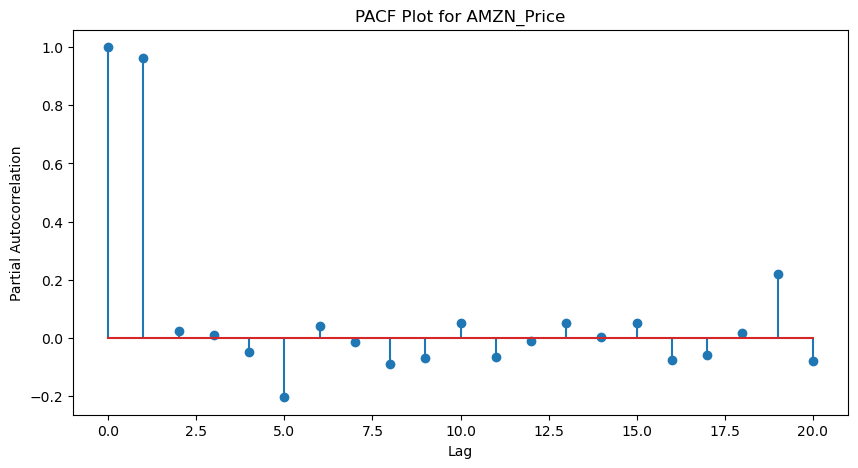

PACF Values:
Lag 0: 1.0
Lag 1: 0.9614570546616911
Lag 2: 0.024891444866462036
Lag 3: 0.007981439590871752
Lag 4: -0.04967809243397961
Lag 5: -0.20473810043961033
Lag 6: 0.03959052559100525
Lag 7: -0.01591974299581176
Lag 8: -0.08936474323514093
Lag 9: -0.07073388568264141
Lag 10: 0.05020974140329729
Lag 11: -0.06542542745094469
Lag 12: -0.009759700084254308
Lag 13: 0.05088217048077227
Lag 14: 0.0011937838323182255
Lag 15: 0.05111403737059302
Lag 16: -0.07679542192238956
Lag 17: -0.059233815287623955
Lag 18: 0.01527663095761353
Lag 19: 0.22029024418276433
Lag 20: -0.07930501643128181

Autocorrelation and Partial Autocorrelation for BABA_Price:


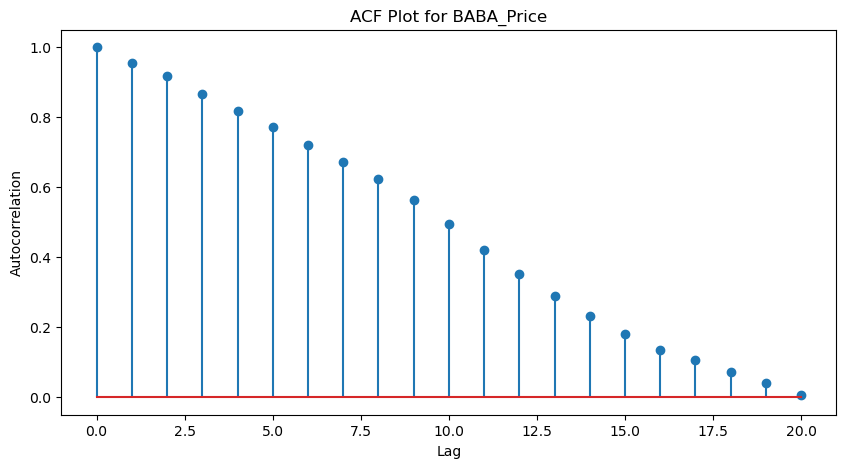

ACF Values:
Lag 0: 1.0
Lag 1: 0.9545659376519573
Lag 2: 0.9172109655877466
Lag 3: 0.8672774277150695
Lag 4: 0.8179260774963291
Lag 5: 0.7717640395393928
Lag 6: 0.7207510903980482
Lag 7: 0.673007306885284
Lag 8: 0.624445137927202
Lag 9: 0.5648106887715479
Lag 10: 0.49382558536940907
Lag 11: 0.4193846974860256
Lag 12: 0.35216288077571684
Lag 13: 0.28910652311939505
Lag 14: 0.23255741105765487
Lag 15: 0.18123815890760858
Lag 16: 0.13544052568896606
Lag 17: 0.10591056990217972
Lag 18: 0.07301875984517354
Lag 19: 0.0396447613626604
Lag 20: 0.005913880806213737


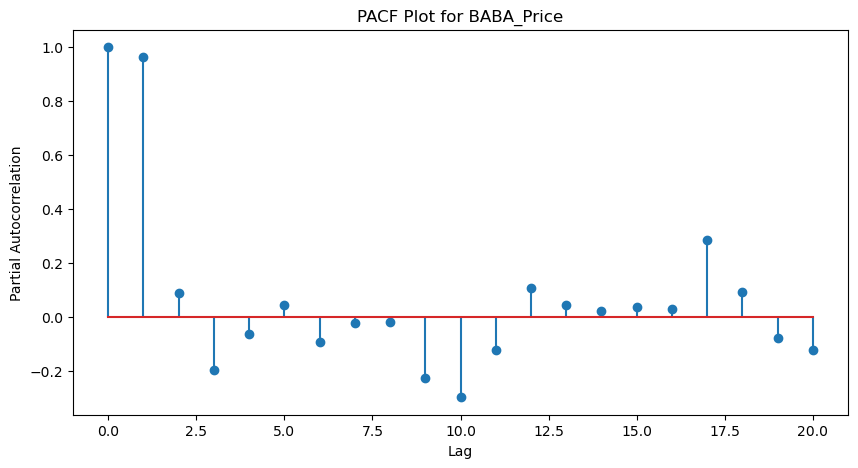

PACF Values:
Lag 0: 1.0
Lag 1: 0.9636570418200712
Lag 2: 0.08708378819201296
Lag 3: -0.19490381099459592
Lag 4: -0.06208744120834176
Lag 5: 0.04343804435512402
Lag 6: -0.09194610872867116
Lag 7: -0.022077075254590555
Lag 8: -0.019651827513571515
Lag 9: -0.22651544042440783
Lag 10: -0.29749943583162886
Lag 11: -0.12375902728558076
Lag 12: 0.10589973206280966
Lag 13: 0.04474657575508586
Lag 14: 0.021765793299071693
Lag 15: 0.03574033291968058
Lag 16: 0.02893615132327184
Lag 17: 0.28390414476492054
Lag 18: 0.09320645777304576
Lag 19: -0.0797017929926221
Lag 20: -0.12080481857049966


In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from sklearn.impute import KNNImputer


data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')  # Coerce errors to NaN
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])

imputer = KNNImputer(n_neighbors=5) 
for col in numeric_cols:
    data[col] = imputer.fit_transform(data[[col]])

for col in numeric_cols:
    print(f"\nAutocorrelation and Partial Autocorrelation for {col}:")
    try:
        if data[col].isnull().all():
            print(f"Column '{col}' contains only NaNs. Skipping.")
            continue

        #Figure 5.1-5.8
        acf_values = acf(data[col], nlags=20)

        #Plot ACF
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(acf_values)), acf_values)
        plt.xlabel("Lag")
        plt.ylabel("Autocorrelation")
        plt.title(f"ACF Plot for {col}")
        plt.show()
        print("ACF Values:")
        for i, val in enumerate(acf_values):
            print(f"Lag {i}: {val}")


       #Figure 5.1-5.8
        pacf_values = pacf(data[col], nlags=20)

        #Plot PACF
        plt.figure(figsize=(10, 5))
        plt.stem(range(len(pacf_values)), pacf_values)
        plt.xlabel("Lag")
        plt.ylabel("Partial Autocorrelation")
        plt.title(f"PACF Plot for {col}")
        plt.show()
        print("PACF Values:")
        for i, val in enumerate(pacf_values):
            print(f"Lag {i}: {val}")

    except Exception as e:
        print(f"Error calculating ACF/PACF for {col}: {e}")

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  106
Model:                     AutoReg(1)   Log Likelihood                -414.746
Method:               Conditional MLE   S.D. of innovations             12.566
Date:                Sun, 15 Dec 2024   AIC                            835.491
Time:                        17:20:30   BIC                            843.453
Sample:                             1   HQIC                           838.717
                                  106                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2124      3.074      1.045      0.296      -2.812       9.237
y.L1           0.9771      0.026     37.525      0.000       0.926       1.028
                                    Roots           

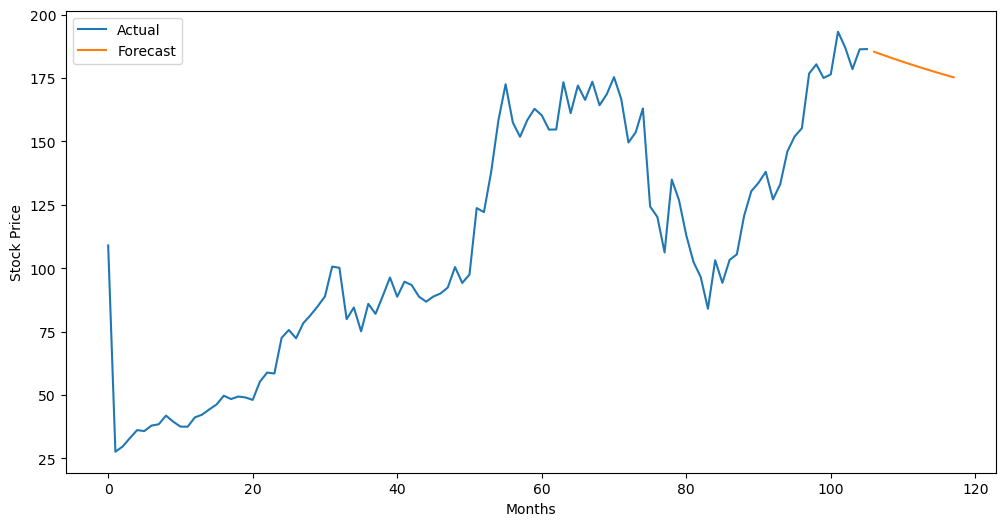

In [36]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg


data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')  # Coerce errors to NaN
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])


imputer = KNNImputer(n_neighbors=5) 
for col in numeric_cols:
    data[col] = imputer.fit_transform(data[[col]])

model = AutoReg(data['AMZN_Price'].values, lags=1).fit() #lags=1 specifies an AR(1) model



print(model.summary())

#Figure 5.9
print("\nModel Parameters:")
print(f"Intercept: {model.params[0]}")
print(f"AR Coefficient (lag 1): {model.params[1]}")

forecast = model.predict(start=len(data['AMZN_Price']), end=len(data['AMZN_Price']) + 11)
print("\nForecast for the next 12 periods:")
print(forecast)



plt.figure(figsize=(12,6))
plt.plot(data['AMZN_Price'],label='Actual')
plt.plot(range(len(data['AMZN_Price']),len(data['AMZN_Price'])+len(forecast)),forecast,label='Forecast')
plt.xlabel('Months')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  106
Model:                     AutoReg(1)   Log Likelihood                -447.251
Method:               Conditional MLE   S.D. of innovations             17.126
Date:                Sun, 15 Dec 2024   AIC                            900.503
Time:                        17:20:53   BIC                            908.464
Sample:                             1   HQIC                           903.729
                                  106                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3201      4.416      1.205      0.228      -3.334      13.974
y.L1           0.9602      0.028     33.955      0.000       0.905       1.016
                                    Roots           

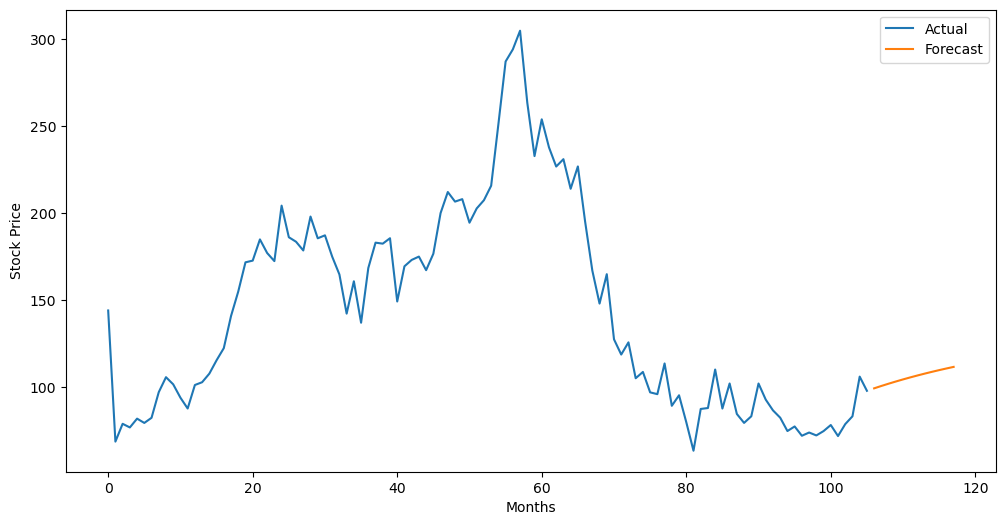

In [37]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg

data = pd.read_csv(r"C:\Users\User\OneDrive\Desktop\Topics in business analytics\Data\Stocks\Business topic raw.csv", parse_dates=['Dates'])

def clean_and_convert(column):
    try:
        column = column.astype(str).str.replace('%', '', regex=False).str.replace(',', '', regex=False).str.strip()
        column = pd.to_numeric(column, errors='coerce')  # Coerce errors to NaN
        return column
    except Exception as e:
        print(f"Error processing column '{column.name}': {e}")
        return column

numeric_cols = ['CHN_inflation_rates', 'US_inflation_rates', 'BABA_Volume', 'AMZN_Volume', 'AMZN_Price', 'BABA_Price']
for col in numeric_cols:
    data[col] = clean_and_convert(data[col])

imputer = KNNImputer(n_neighbors=5) 
for col in numeric_cols:
    data[col] = imputer.fit_transform(data[[col]])

model = AutoReg(data['BABA_Price'].values, lags=1).fit() 



print(model.summary())


print("\nModel Parameters:")
print(f"Intercept: {model.params[0]}")
print(f"AR Coefficient (lag 1): {model.params[1]}")

forecast = model.predict(start=len(data['BABA_Price']), end=len(data['BABA_Price']) + 11)
print("\nForecast for the next 12 periods:")
print(forecast)

#Figure 6.0
plt.figure(figsize=(12,6))
plt.plot(data['BABA_Price'],label='Actual')
plt.plot(range(len(data['BABA_Price']),len(data['BABA_Price'])+len(forecast)),forecast,label='Forecast')
plt.xlabel('Months')
plt.ylabel('Stock Price')
plt.legend()
plt.show()